# Exercise Set 3

Due: **10:00 25 April 2022**

Discussion: **13:00 29 April 2022**

**Online submission** at via [ILIAS](https://www.ilias.uni-koeln.de/ilias/goto_uk_exc_4593683.html) in the directory Exercises / Übungen -> Submission of Exercises / Rückgabe des Übungsblätter

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from astropy.io import fits
from spectral_cube import SpectralCube

# 1. Averaging spectral radio data [50 Points]

In this exercise you will work on a data set of artificial radio observation `radio-map.fits`. It is a map of 5x5 spectra with 201 measured frequency/velocity channels (channel width is unity). If you number all spectra from 1 to 25 we use the following scheme to assign spectra to positions on the map (spectrum 1 is the top left spectrum):

**a.** Compute the total “integrated-intensity” map of the observations, i.e. integrate the spectra over the full spectral range for all positions and plot the 5x5 map in a suitable way. **10 Points**

In [44]:
hdul = "radio-mapfits.sec"
data=fits.getdata(hdul, ext=0)

image=[]
integrated=np.zeros((5,5))
cum_spec=np.zeros(201)
for i in range(5):
    for j in range(5):
        for k in range(201):
            integrated[i,j]+=data[i,j,k]
            image.append(data[i,j,k])
            cum_spec[k]+=data[i,j,k]


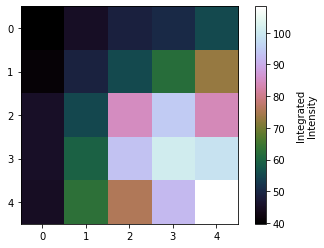

In [45]:
frame=data[:,:,0]
x=np.linspace(0,201,201)
fig, ax=plt.subplots(1)
im=ax.imshow(integrated,'cubehelix')
plt.savefig("plots/integrated_intensity_map.png",dpi=400,bbox_inches="tight")
plt.colorbar(im,label="Integrated\nIntensity")

**b.** Compute two channel maps by integrating over the frequency channels 50-100 and 100-150. Compare the two maps. **10 Points**

In [46]:
#b. Compute two channel maps by integrating over the frequency channels 50-100 and 100-150.
#Compare the two maps. 10 Points
map1=np.zeros((5,5))
map2=np.zeros((5,5))
for i in range(5):
    for j in range(5):
        k=50
        while k < 101:
            map1[i,j]+=data[i,j,k]
            k+=1
        l=100
        while l < 151:
            map2[i,j]+=data[i,j,l]
            l+=1

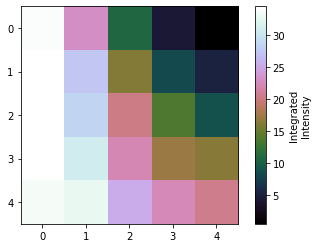

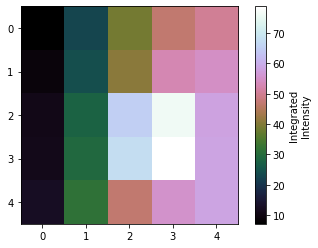

In [47]:
fig2, ax2=plt.subplots(1)
im2=ax2.imshow(map1,'cubehelix')
plt.savefig("plots/map_1.png",dpi=400,bbox_inches="tight")
plt.colorbar(im2,label="Integrated\nIntensity")

fig3, ax3=plt.subplots(1)
im3=ax3.imshow(map2,'cubehelix')
plt.savefig("plots/map_2.png",dpi=400,bbox_inches="tight")
plt.colorbar(im3,label="Integrated\nIntensity")

The second map, which contains data from channels 100 to 150, has higher intensity emission, which is located in a smaller region of the image. The first map, with data from channels 50 to 100, shows emission across the 5x5 image, but it is less intense than the emssion from the second map.

**c.** Compute the average spectrum, by averaging all 25 positions. **10 Points**

In [48]:
#c. Compute the average spectrum, by averaging all 25 positions. 10 Points
avg_spec=cum_spec/25.0

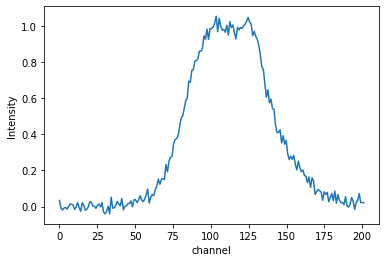

In [49]:
fig4, ax4=plt.subplots(1)
im4=ax4.plot(x,avg_spec)#,'cubehelix')
plt.xlabel("channel")
plt.ylabel("Intensity")
plt.savefig("plots/avg_spec.png",dpi=400,bbox_inches="tight")

**d.** Plot every spectrum and overlay the average spectrum. Describe how the emission changes across the map. In particular how the line center position, the peak height and the line widths behave. **20 Points**

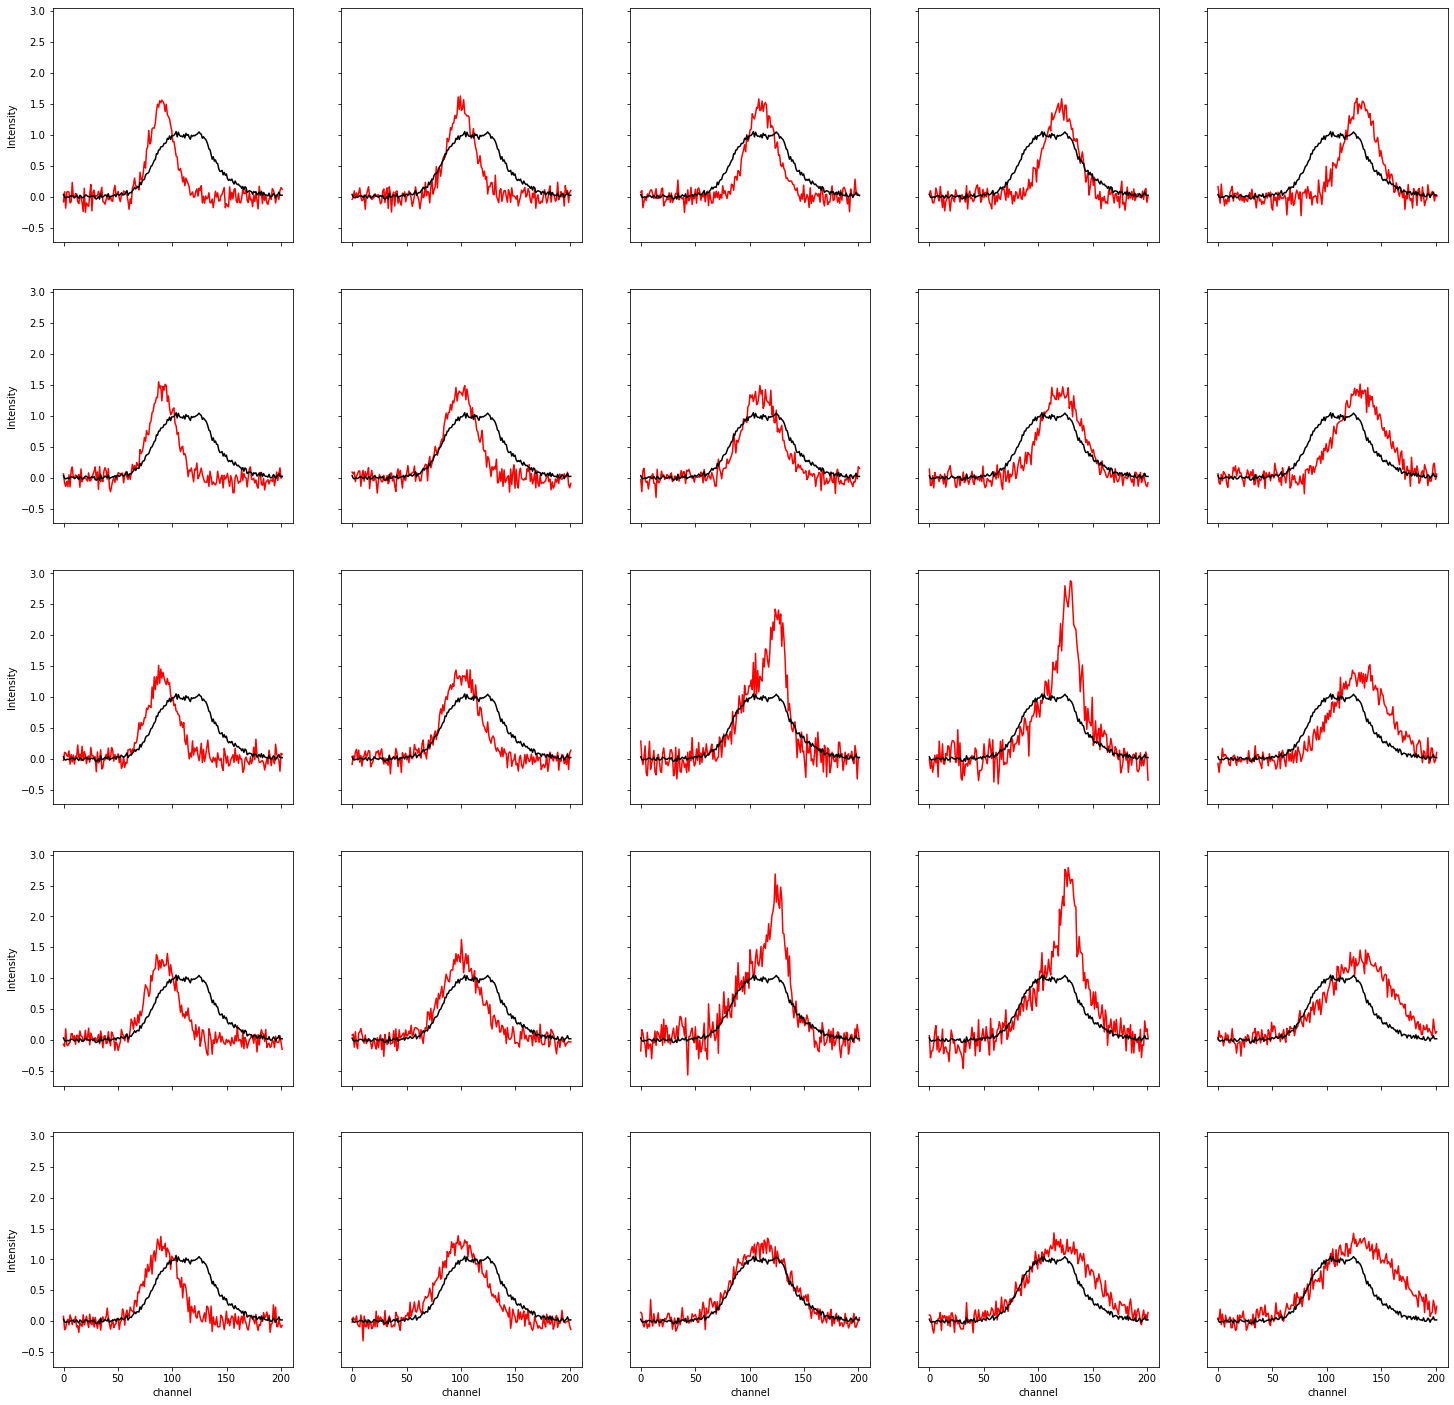

In [50]:
fig5,ax5=plt.subplots(5,5,figsize=(25,25), sharey=True, sharex=True, squeeze=False)
for i in range(5):
    for j in range(5):
        ax5[i,j].plot(x,data[i,j,:],color='red')#,label="every spectrum")#,'cubehelix')
        ax5[i,j].plot(x,avg_spec,color='black')#,label="average spectrum")
        ax5[4,j].set_xlabel("channel")
        ax5[i,0].set_ylabel("Intensity")
plt.savefig("plots/every_spec"+".png",dpi=400,bbox_inches="tight") #+str(i)+"i"+str(j)+"j"

The line center position changes with the horizontal position of the spectrum. i.e, For pixels on the left of the image, the line center of the spectrum is shifted left of the line center of the average spectrum. The line center of spectra of the right hand pixels are shifted to the right of the line center of the average spectrum.

The peak height of the spectra increases with the integrated intensity at that position. i.e, in positions where the integrated intensity is higher, the peak height is also higher. 

The spectra towards the bottom of the 5x5 image also seem to have broader lines than the spectra at the top of the image.

# 2. Bayesian inference - conditional probabilities [50 Points]

Consider the proverbial bad penny, for which prior information has indicated that there is a probability of $P_r(B)=99$ that it is unbiased ("ok"); or a probability of $P$(B)=0.01 that it is double-headed ("dh").

**a.** Draw a tree diagram and label and label the nodes with the corresponding events and the vertices with the corresponding probabilities. **5 Points**

**b.** Suppose that the coin is fair, what is the probability P(A|B) of obtaining n heads in a row? **10 Points**

**c.** Now suppose, the coins is unfair, i.e. double-headed, what is the probability P(A|B) of obtaining n heads in a row in this case? **5 Points**

**d.** Give the probability P(A) = P(n heads in a row) given our initial priors. **10 Points**

**e.** Give the (Bayesian) posterior probability P(B|A) of obtaining n heads in a row. **10 Points**

**f.** What are the odds on the penny being fair, i.e. what is the (Bayesian) posterior probability P(B|A) given this information, if we obtain 2 heads in a row? What is the probability if we obtain 7 heads in a row? In the last case (7 heads) how might we consider the fairness of the coin? Or of the experimenter who provided us with the prior information? **10 Points**